<center><img src = "Images/ATU_Logo.jpg"></center>

<h2 style="color: #001a79;">Author: Sam Tracey</h2>
<h2 style="color: #001a79;">Module: Machine Learning and Statistics</h2>
<h2 style="color: #001a79;">Topic 2. Models.</h2>

<hr style="border-top: 1px solid #001a79;" />



<h3 style="color: rgb(0, 91, 94);">Scenario</h3>

Suppose you are trying to weigh your suitcase to avoid an airline's extra charges.

You don't have a weighing scales, but you do have a spring and some gym-style weights of masses 7KG, 14KG and 21KG.

You attach the spring to the wall hook, and mark where the bottom of it hangs.

You then hang the 7KG weight on the end and mark where the bottom of the spring is.

You repeat this with the 14KG weight and the 21KG weight.

Finally, you place your case hanging on the spring, and the spring hangs down halfway between the 7KG mark and the 14KG mark.

Is your case over the 10KG limit set by the airline?

<h3 style="color: rgb(0, 91, 94);">Experiment</h3>

You decide to experiment.

You buy some new weights - a 1KG, a 2KG, a 3Kg, all the way up to 20KG.

You place them each in turn on the spring and measure the distance the spring moves from the resting position.

You tabulate the data and plot them. <a href="https://github.com/ianmcloughlin/2223-S1-machine-learn-stats/blob/main/notebooks/02-models.ipynb">(McLoughlin, 2022)</a>

In [1]:
# Importing Necessary Modules
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Nicer colours and styles for plots.
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['figure.dpi'] = 80

In [2]:
# Create some fake data representing weight and distance
# Use seed to generate redictable random numbers.
np.random.seed(0)
# Independent variable - weight.
weight = np.arange(0.0, 21.0, 1.0)

# Dependent variable - distance with random noise added.
distance = 5.0 * weight + 10.0 + np.random.normal(0.0, 2.0, weight.size)

In [3]:
# Look at the weight values.
weight

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20.])

In [4]:
# Look at the distance values.
distance

array([ 13.52810469,  15.80031442,  21.95747597,  29.4817864 ,
        33.73511598,  33.04544424,  41.90017684,  44.69728558,
        49.7935623 ,  55.821197  ,  60.28808714,  67.90854701,
        71.52207545,  75.24335003,  80.88772647,  85.66734865,
        92.98815815,  94.58968347, 100.6261354 , 103.29180852,
       104.89402037])

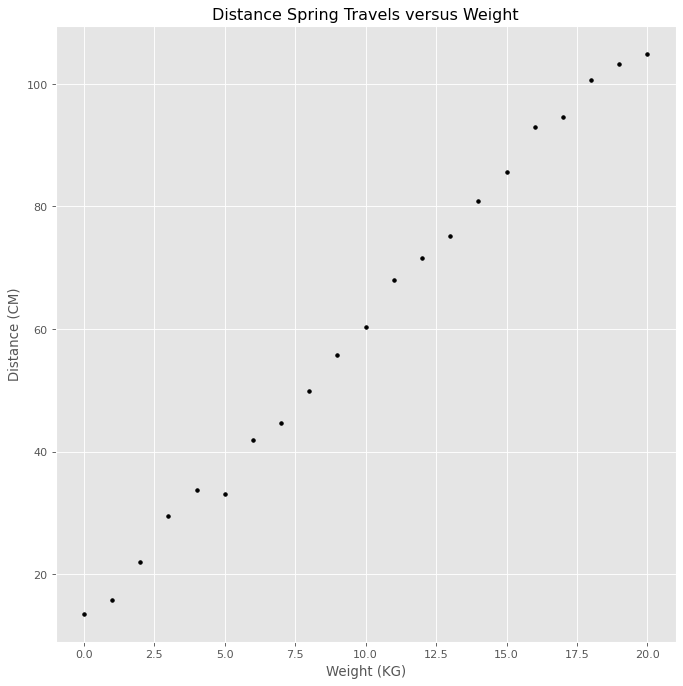

In [5]:
# Create the plot.

plt.plot(weight, distance, 'k.')

# Set some properties for the plot.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.title('Distance Spring Travels versus Weight')

# Show the plot.
plt.show()

<h3 style="color: rgb(0, 91, 94);">Minimising the cost</h3>

For our given data set we can plot the cost value/function.


$$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$



In [6]:
# Calculate the best values for m and c.

# First calculate the means (a.k.a. averages) of w and d.
w_avg = np.mean(weight)
d_avg = np.mean(distance)

# Subtract means from w and d.
w_zero = weight - w_avg
d_zero = distance - d_avg

# The best m is found by the following calculation.
m = np.sum(w_zero * d_zero) / np.sum(w_zero * w_zero)
# Use m from above to calculate the best c.
c = d_avg - m * w_avg

print("m is %8.6f and c is %6.6f." % (m, c))

m is 4.815516 and c is 12.686140.


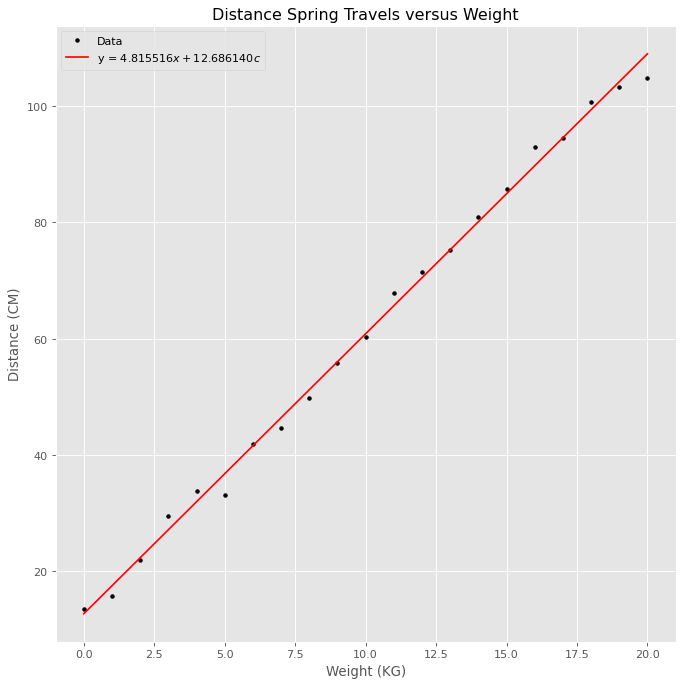

In [7]:
# Plot w versus d with black dots.
plt.plot(weight, distance, 'k.', label="Data")

# Overlay best fitted line based on m and c calculated above.
x = np.arange(0.0, 21.0, 1.0)
plt.plot(x, m * x + c, 'r-', label=r"y = $4.815516x + 12.686140c$")


# Add a legend.
plt.legend()

# Add axis labels.
plt.xlabel('Weight (KG)')
plt.ylabel('Distance (CM)')
plt.title('Distance Spring Travels versus Weight')

# Show the plot.
plt.show()

In [8]:
# Using Numpy to calculate best m and c values.
np.polyfit(weight, distance, 1)

array([ 4.8155165, 12.68614  ])

In [9]:
# Create cost function.
cost = lambda m,c: np.sum([(distance[i] - m * weight[i] - c)**2 for i in range(weight.size)])
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (m, c, cost(m, c)))

Cost with m =  4.82 and c = 12.69:    68.76


<h3 style="color: #001a79;">Exercise 1</h3>

<hr style="border-top: 1px solid #001a79;" />


Use numpy and matplotlib to plot the absolute value function.

Research and explain why the absolute value function is not typically used in fitting straight lines to data.

<h3 style="color: #001a79;">The Absolute Value Function</h3>



The graph below shows three different absolute value functions:

- $y=|x|$
- $y=|x-1|+5$
- $y= -2|x|+4$

The key characteristic of the absolute value function is the distinct v shape. This shape indicates the function involves taking the absolute value. The point where the graph changes direction, at the bottom or top of the v for the parent function. When it is at the bottom like this, it is called a minimal vertex. If the vertex is at the top, it is called a maximal vertex. <a href="https://www.varsitytutors.com/hotmath/hotmath_help/topics/absolute-value-functions">(Varsity Tutors, Date unknown)</a>

The General form of an absolute value equation is:

$$f(x)=a∣x−h∣+k$$

<br>
The variable <b><i>a</i></b> tells us how far the graph stretches vertically, and whether the graph opens up or down. The variables <b><i>h</i></b> and <b><i>k</i></b> tell us how far the graph shifts horizontally and vertically.

In [10]:
# Create array with both negative and positive integers.
x = np.random.randint(-20, 20, 100)

In [11]:
# Create arrays based on various Absolute Value Functions.
y = abs(x)
y1 = abs(x-1)+5
y2 = -2*abs(x)+4

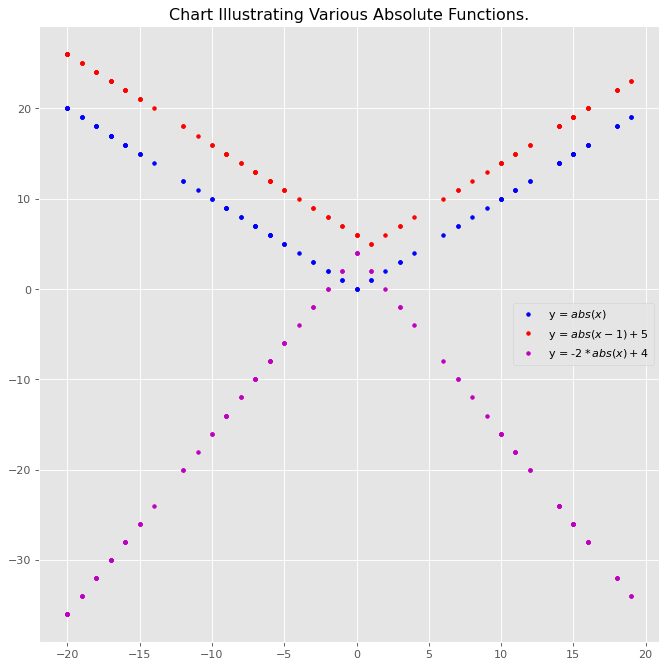

In [12]:
# Create the plot.

plt.plot(x, y, 'b.', label=r"y = $abs(x)$")
plt.plot(x, y1, 'r.', label=r"y = $abs(x-1)+5$")
plt.plot(x, y2, 'm.', label=r"y = -$2*abs(x)+4$")

plt.legend()
# Set some properties for the plot.

plt.title('Chart Illustrating Various Absolute Functions.')


# Show the plot.
plt.show()

<h3 style="color: #001a79;">Common Loss Functions and Evaluation Metrics in Machine Learning for Regression.</h3>


Mean Absolute Error (MAE) is less biased for large errors / outliers but may not adequately represent larger errors.
<br>

$$MAE: \sum_{i=1}^{D}|x_i-y_i|$$

<br>
Mean Squared Error (MSE) is highly biased for large errors and outliers.
<br>

$$MSE: \sum_{i=1}^{D}(x_i-y_i)^2$$

In [13]:
# Create two arrays.
true = [244, 255, 311, 291, 407, 323, 431, 319, 380, 266]
predicted = [248, 276, 340, 285, 403, 325, 400, 322, 387, 300]

In [14]:
# Define a Mean Absolute Error Function.
def mae(y_true, predictions):
    y_true, predictions = np.array(y_true), np.array(predictions)
    return np.mean(np.abs(y_true - predictions))

In [15]:
# Call mae function and print result.
print(f'Mean Absolute Error = {mae(true, predicted)}')

Mean Absolute Error = 14.1


In [16]:
#Calculate and display MSE
mse = np.square(np.subtract(true, predicted)).mean()
print(f'Mean Squared Error = {mse}')

Mean Squared Error = 352.9


In [17]:
# Change the first value in predicted array to be an outlier.
predicted[0] = 400

In [18]:
print(f'Mean Absolute Error = {mae(true, predicted)}')

Mean Absolute Error = 29.3


In [19]:
#Calculate and display MSE
mse = np.square(np.subtract(true, predicted)).mean()
print(f'Mean Squared Error = {mse}')

Mean Squared Error = 2784.9


Notice above that the addition of one outlier increased the MSE metric much more drammatically than the MAE metric.<br>
We can visualize the difference between MAE and MSE if we plot both funtions with respect to their loss for a given prediction error.<br>
With a prediction error of -5, MAE generates a loss of -5 whereas MSE generates a loss of -25.

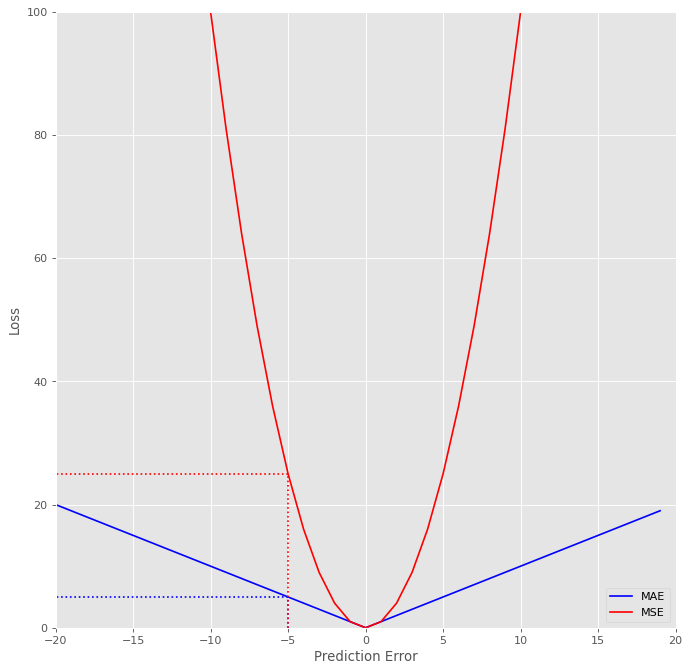

In [20]:
# Reference: https://towardsdatascience.com/understanding-the-3-most-common-loss-functions-for-machine-learning-regression-23e0ef3e14d3
# Plotting the MAE and MSE loss functions.
# Define x.
x = np.arange(-20, 20, 1)
# Mean Absolute Error
y_mae = np.abs(x)


# Mean Square Error
y_mse = np.square(x)

plt.plot(x, y_mae, "blue", label="MAE")
plt.plot(x, y_mse, "red", label="MSE")

# Plot the intersection of -5 absolute value with respect to loss function.
plt.plot([-5, -5], [0, 5], 'b:')
plt.plot([-5, -20], [5, 5], 'b:')


# Plot the intersection of -5 MSE value with respect to loss function.
plt.plot([-5, -5], [0, 25], 'r:')
plt.plot([-5, -20], [25, 25], 'r:')

plt.xlabel("Prediction Error")
plt.ylabel("Loss")
plt.legend(loc="lower right")
plt.grid(True, which="both")
plt.axis([-20, 20, 0, 100])
plt.show()

<h3 style="color: #001a79;">Common Loss Functions and Evaluation Metrics in Machine Learning for Regression.</h3>


As we have learned in this topic, the goal in linear regression is to fit the best line which *minimises the Cost function.*<br>

The cost function being:<br> $$ Cost(m, c) = \sum_i (y_i - mx_i - c)^2 $$

When Mean Squared Error is used, optimization of the Cost function can be performed using calculus.<br>
First we calculate the partial derivatives then set to zero and finally solve the simultaneous equations.<br>

The problem we face when using Mean Absolute Error is that |x| is not differentiable at x = 0.<br>
<br>

Consider the following example where we are trying to find<br>
$$\lim_{h\to0}\frac{f(0+h)-f(0)}{h}\quad\text{where }f(x)=|x|$$<br>
$$\lim_{h\to0}\frac{|0+h|-|0|}{h}$$<br>
$$=\lim_{h\to0}\frac{|h|}{h}$$<br>
<br>
Find the right limit:<br>
$$=\lim_{h\to0}\frac{|h|}{h}$$<br>
Since $h > 0$ <br>
$$=\lim_{h\to0^+}\frac{h}{h}=1$$<br>
<br>
We then find the left limit:<br>
$$=\lim_{h\to0^-}\frac{|h|}{h}$$<br>
and since $h < 0$ <br>
$$=\lim_{h\to0^-}\frac{-h}{h}=-1$$<br>
<br>
Since the left and right limits are not the same, the limit does not exist. <br>
Reference: https://math.dartmouth.edu/opencalc2/cole/lecture21.pdf<br>
MSE is a differentiable function that makes it easy to perform mathematical operations in comparison to a non-differentiable function like MAE.
A way to visualize this is to consider the two absolute value functions in the following plots.


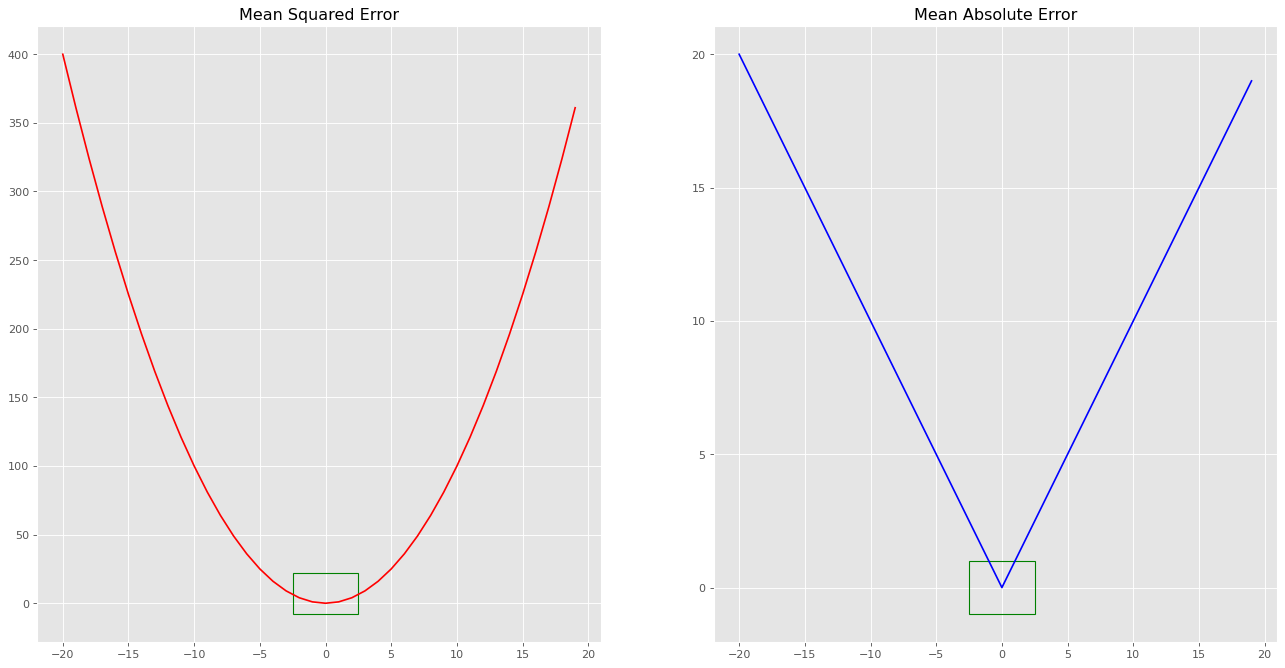

In [21]:
import matplotlib.patches as patches
# Plotting the MSE loss functions.
# Define x.
x = np.arange(-20, 20, 1)

# Mean Square Error
y_mse = np.square(x)

# Mean Absolute Error
y_mae = np.abs(x)

# Create a Rectangle patch
rect1 = patches.Rectangle((-2.5, -8), 5, 30, linewidth=1, edgecolor='g', facecolor='none')
rect2 = patches.Rectangle((-2.5, -1), 5, 2, linewidth=1, edgecolor='g', facecolor='none')

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,10))
axes[0].plot(x, y_mse, "red", label="MSE")
axes[0].set_title("Mean Squared Error")
axes[0].add_patch(rect1)
axes[1].plot(x, y_mae, "blue", label = "MAE")
axes[1].set_title("Mean Absolute Error")
axes[1].add_patch(rect2)
plt.show()

When we look at the Mean Squared Error function as it approaches zero, you will notice that there is a smooth transition from a downward descent to an upward descent. With the Mean Absolute error on the other hand there is an abrupt change in direction. If we zoomed in really closely at the 0,0 point in the Mean Squared Error function it would look for all intents and purposes like a striaght line. With the Mean Absolute error you would never see a straight line at 0,0. If a function is differentiable, it should look like a straight line when you zoom in far enough. (reference: https://math.stackexchange.com/questions/991475/why-is-the-absolute-value-function-not-differentiable-at-x-0)<br>
<br>
The concepts of Mean Absolute Error and Mean Squared Error are equally intuitive. However, in mathematical terms unlike least squared regression, calculating the least absolute deviations does not have an analytical solving method meaning it is not as simple to compute efficiently.

<h3 style="color: #001a79;">Exercise 2</h3>

<hr style="border-top: 1px solid #001a79;" />

Fit a straight line to the following data points, using all three methods used above.

Do you think a straight line is a good model for these points?

```python
x = [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0]
y = [0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1]
```

<hr style="border-top: 1px solid #001a79;" />

In [22]:
# Importing optimize module.
import scipy.optimize as so

In [23]:
# Create Numpy arrays (x and y) from the values given.
x = np.asarray([2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0])
y = np.asarray([0.7, 1.1, 1.5, 1.6, 1.7, 2.0, 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2, 2.7, 2.5, 2.7, 2.8, 2.9, 3.1])

# Display x and y.
x, y

(array([ 2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19., 20.]),
 array([0.7, 1.1, 1.5, 1.6, 1.7, 2. , 2.3, 2.4, 2.2, 2.1, 2.4, 2.6, 2.2,
        2.7, 2.5, 2.7, 2.8, 2.9, 3.1]))

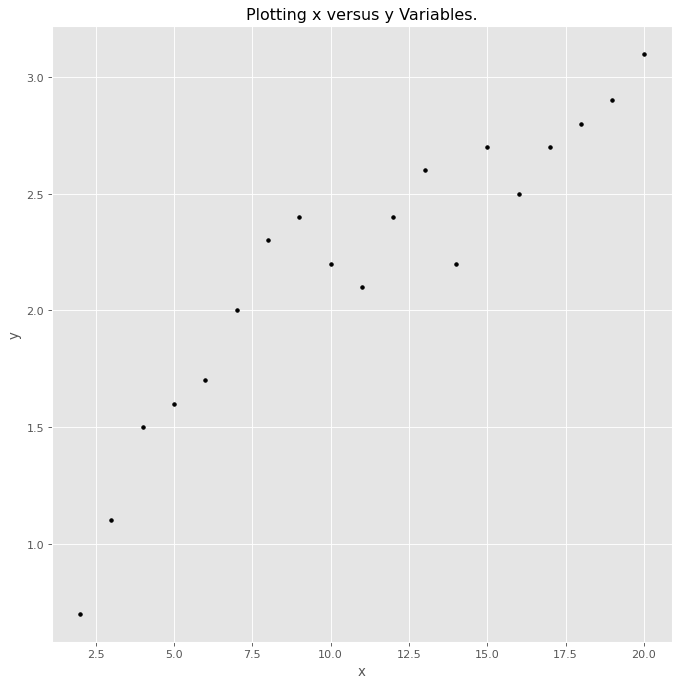

In [24]:
# Taking a quick look at the data.

plt.plot(x, y, 'k.')

# Set title and axis labels.
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plotting x versus y Variables.')

# Show the plot.
plt.show()

<h3 style="color: #001a79;">Method 1. Using Numpy Polyfit.</h3>

<hr style="border-top: 1px solid #001a79;" />


In [25]:
# Calculating analytical Result using numpy polyfit function.
m_a, c_a = np.polyfit(x, y, 1)
# Print the m and c values calculated:
m_a, c_a

(0.10315789473684217, 1.0494736842105254)

<h3 style="color: #001a79;">Method 2. Using Scipy Optimize.</h3>

<hr style="border-top: 1px solid #001a79;" />

In [26]:
# Loss function to be passed to scipy optimize (directly from Ian's code).
def cost(MC):
    # Unpack the values m and c.
    m, c = MC
    # We need the data points in this function.
    cost = np.sum((y - m * x - c)**2)
    # Return that value.
    return cost

In [27]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html#scipy.optimize.minimize
result = so.minimize(cost, (5.0, 10.0))
# Show the results.
result

      fun: 1.0395789473691093
 hess_inv: array([[ 0.00087719, -0.00964912],
       [-0.00964912,  0.13245607]])
      jac: array([ 1.49011612e-08, -1.49011612e-08])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 6
     njev: 8
   status: 0
  success: True
        x: array([0.10315786, 1.04947406])

In [28]:
# Extract the optimized m and c.
m_o, c_o = result.x
# Print them.
m_o, c_o

(0.10315786001023217, 1.0494740586628448)

<h3 style="color: #001a79;">Method 3. Using Scipy Curve_fit.</h3>

<hr style="border-top: 1px solid #001a79;" />

In [29]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# Create a model function required by optimize.curve_fit.
def f(x, m, c):
    return m * x + c

In [30]:
# Run curve fit
result = so.curve_fit(f, x, y)

# Look at result
result

(array([0.10315789, 1.04947369]),
 array([[ 0.00010728, -0.00118012],
        [-0.00118012,  0.01619984]]))

In [31]:
# Extract parameters from curve_fit.
m_f, c_f = result[0]

# Print values
m_f, c_f

(0.10315789458399933, 1.0494736859688867)

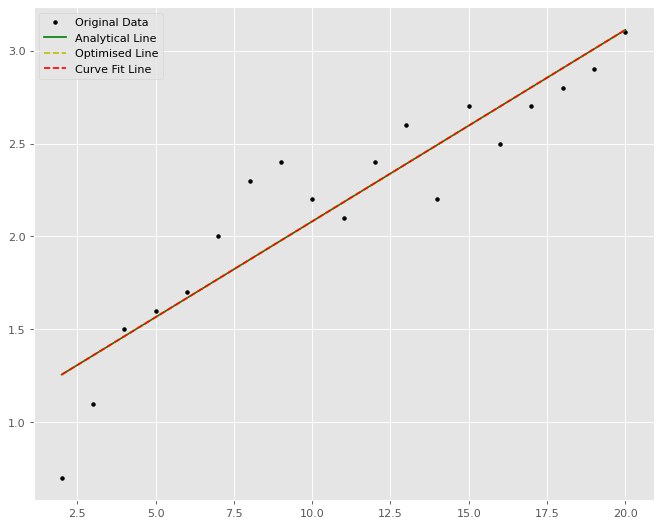

In [32]:
# Plot the best fit lines.

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x, y, 'k.', label='Original Data')
ax.plot(x, m_a * x + c_a, 'g-', label = 'Analytical Line')
ax.plot(x, m_o * x + c_o, 'y--', label = 'Optimised Line')
ax.plot(x, m_f * x + c_f, 'r--', label = 'Curve Fit Line')
ax.legend()
plt.show()

In [33]:
# Calculate the cost of the lines above for the data above.
cost = lambda m,c: np.sum([(x[i] - m * y[i] - c)**2 for i in range(y.size)])

print(f"Cost for Analytical line : {cost(m_a, c_a)}")
print(f"Cost for Optimised line : {cost(m_o, c_o)}")
print(f"Cost for Curve Fit line : {cost(m_f, c_f)}")


Cost for Analytical line : 2354.9578947368423
Cost for Optimised line : 2354.957788419026
Cost for Curve Fit line : 2354.95789422815


<h3 style="color: #001a79;">Discussion.</h3>


When we plot the three best line fits from the methods that we have covered in this section, we can see that they are almost identical. In fact, it is very difficult to see any difference at all in the plot above.<br>
Reviewing the Cost for each of the functions, we can again see that the value returned is almost identical for the the three methods.<br>
<br>
However, you can see from the data points that there is some curvature which indicates that a non-linear regression line would be a better fit for this dataset.
<br>
In the next few blocks we are going to define a polynomial cost function to pass to Scipy's curve_fit function and use the parameters returned to determine if a polynomial fit gives us improved performance.


<hr style="border-top: 1px solid #001a79;" />

In [34]:
# Define a new cost function to pass to curve_fit using 2nd order polynomial.
# Reference: https://machinelearningmastery.com/curve-fitting-with-python/
def quadratic_cost(x,a,b,c):
    return a*x**2 + b*x + c

# do quadratic fit
fit_paramsQ, covariances = so.curve_fit(quadratic_cost, x, y)
a, b, c = fit_paramsQ

# Print out the polnomial equation for y.
print('Parameter values: ')
print('y = %.5f * x^2 + %.5f * x + %.5f' % (a, b, c))


Parameter values: 
y = -0.00519 * x^2 + 0.21733 * x + 0.57723


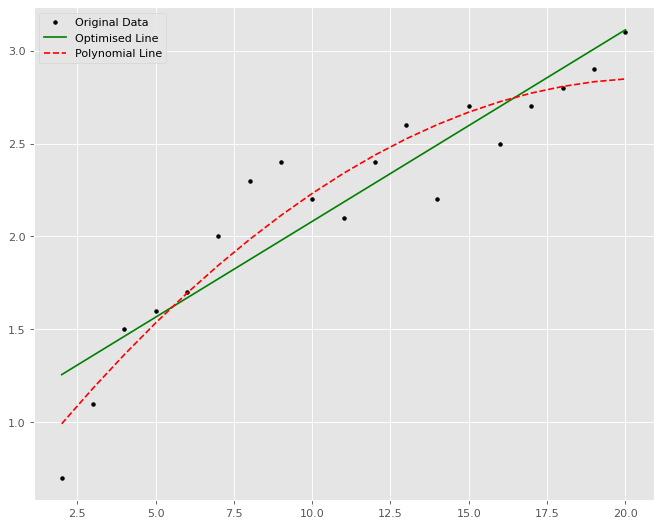

In [35]:
# Plot polynomial line versus optimized line

fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(x, y, 'k.', label='Original Data')
ax.plot(x, m_a * x + c_a, 'g-', label = 'Optimised Line')
ax.plot(x, a * np.square(x) + b * x + c, 'r--', label = 'Polynomial Line')
ax.legend()
plt.show()

In [36]:
# Note - we could also have used np.polyfit to find these parameters:
params = np.polyfit(x,y,2)
params

array([-0.00518944,  0.21732567,  0.57723426])

In [37]:
# Create predictions using optimized regression equation
predict_opt = (m_o * x + c_o)

In [38]:
# Create predictions using polynomial regression equation
predict_poly = (-0.00519 * np.square(x) + 0.21733 * x + 0.57723)

In [39]:
# Import MSE function from sklearn - rather than repeat the mse equation we created above.
from sklearn.metrics import mean_squared_error

In [40]:
mse_opt = (mean_squared_error(y,predict_opt))
mse_poly = (mean_squared_error(y,predict_poly))

In [42]:
print(f'\nThe MSE for the 2nd Order Polynomial Regression is: {mse_poly} while the MSE for the optimized regression is {mse_opt}\n')


The MSE for the 2nd Order Polynomial Regression is: 0.03548642877368421 while the MSE for the optimized regression is 0.05471468144047944



<h3 style="color: #001a79;">Discussion Continued.</h3>


Visually we can see that the polynomial fitted line better represents the underlying data.<br>
When we create new prediction data sets based on the optimized linear regression equation and the polynomial regression equation we can then calculate the Mean Square Error for them both.<br>
The MSE for the polynomial regression is lower than that of the linear regression (0.0355 versus 0.0547) so we can conclude that the polynomial regression line is a better fit than the straight line linear regression.

<hr style="border-top: 1px solid #001a79;" />

References:

1. McLoughlin, I., 2022. Notebook: Models. 22-23: 52954 -- MACHINE LEARNING AND STATISTICS. ATU. Unpublished.
2. Varsity Tutors (Date Unknown) Absolute Value Functions. Available at:https://www.varsitytutors.com/hotmath/hotmath_help/topics/absolute-value-functions (Accessed November 2022).
3. Chugh, A., 2020. MAE, MSE, RMSE, Coefficient of Determination, Adjusted R Squared — Which Metric is Better? Available at: https://medium.com/analytics-vidhya/mae-mse-rmse-coefficient-of-determination-adjusted-r-squared-which-metric-is-better-cd0326a5697e (Accessed November 2022).
4. Mathematics Stack Exchange (2014) Why is the absolute value function not differentiable at x = 0? Available at: https://math.stackexchange.com/questions/991475/why-is-the-absolute-value-function-not-differentiable-at-x-0 (Accessed November 2022).

***
### End of Notebook